In [1]:

import pandas as pd
import numpy as np
import kagglehub
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
# Download latest version
path = kagglehub.dataset_download("rakannimer/air-passengers")
df = pd.read_csv(path+'/AirPassengers.csv', parse_dates=["Month"], index_col="Month")

In [3]:
df.rename(columns={"#Passengers": "Thousands of Passengers"}, inplace=True)

In [4]:
df.index.freq = 'MS'

In [5]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [7]:
train_data,test_data = df.iloc[:109], df.iloc[108:]

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [9]:
fitted_model = ExponentialSmoothing(train_data["Thousands of Passengers"],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

In [10]:
test_predictions = fitted_model.forecast(36)

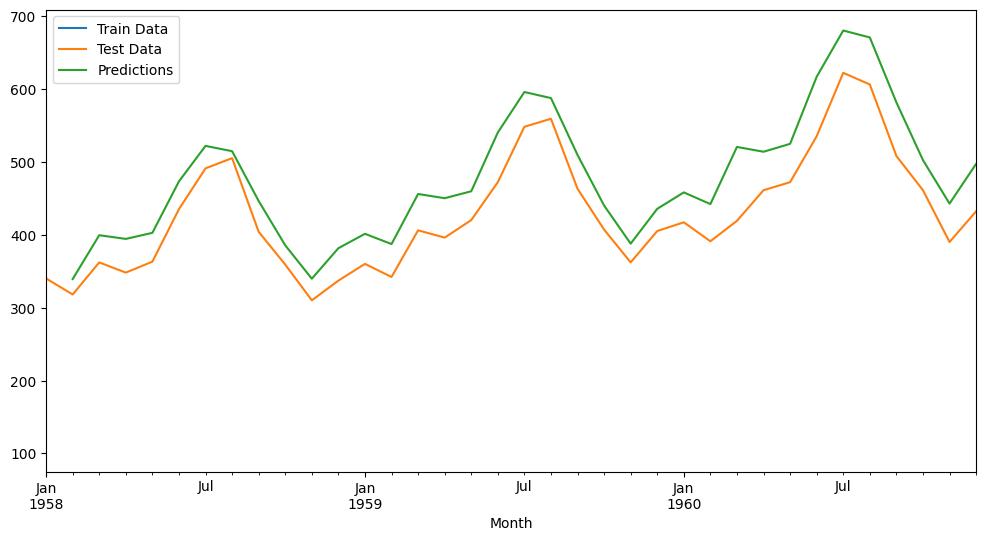

In [11]:
train_data["Thousands of Passengers"].plot(legend=True,label='Train Data', figsize=(12, 6))
test_data["Thousands of Passengers"].plot(legend=True,label='Test Data')
test_predictions.plot(legend=True, label='Predictions',xlim=['1958-01-01', '1960-12-01'])
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [13]:
mean_absolute_error(test_data,test_predictions)

np.float64(63.03104082299123)

In [14]:
mean_squared_error(test_data,test_predictions)

np.float64(5614.236501157957)

In [15]:
np.sqrt(mean_squared_error(test_data,test_predictions))

np.float64(74.92820898138402)

In [16]:
final_model = ExponentialSmoothing(df["Thousands of Passengers"],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

In [17]:
from statsmodels.tsa.statespace.tools import diff

In [18]:
df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Freq: MS, Name: Thousands of Passengers, Length: 144, dtype: float64

### ACF và PACF

In [19]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
# Giải thích từng hàm
# acovf: tính toán hàm tự hiệp phương sai (autocovariance function)
# acf: Tính toán hàm tự tương quan (autocorrelation function)
# pacf: Tính toán hàm tự tương quan riêng phần (partial autocorrelation function)
# pacf_yw: Tính PACF sử dụng phương pháp Yule-Walker
# pacf_ols: Tính PACF sử dụng hồi quy OLS

In [20]:
# NON STATIONARY:
df1 = df

In [21]:
path = kagglehub.datasets.dataset_download('jamieleech/daily-total-female-births')
df2 = pd.read_csv(path+'/daily-total-female-births.csv')

In [22]:
df2["Date"] = pd.to_datetime(df2["Date"])
df2.set_index("Date", inplace=True)

In [23]:
df = pd.DataFrame({"a":[1,2,3,4,5]})

In [24]:
acf(df)

array([ 1. ,  0.4, -0.1, -0.4, -0.4])

In [25]:
from pandas.plotting import lag_plot

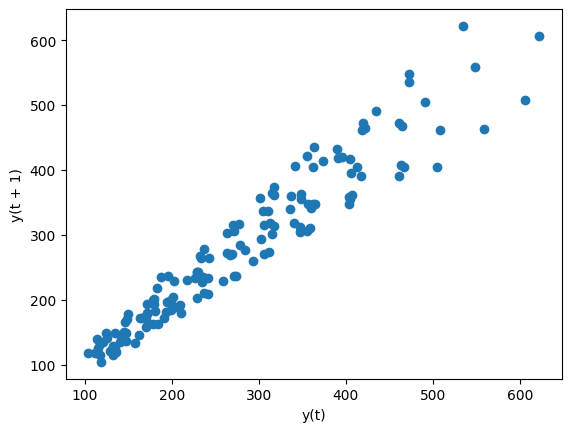

In [27]:
lag_plot(df1["Thousands of Passengers"])
plt.show()

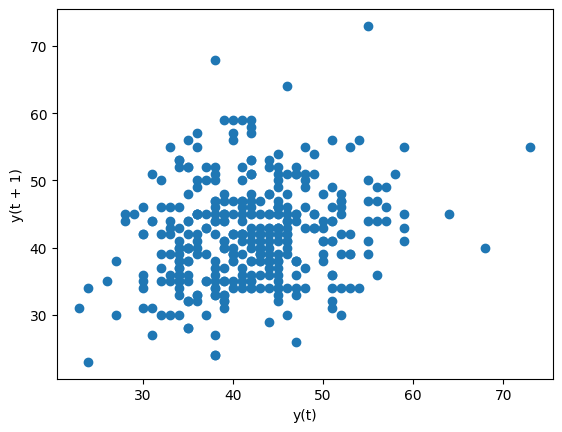

In [28]:
lag_plot(df2["Births"])
plt.show()

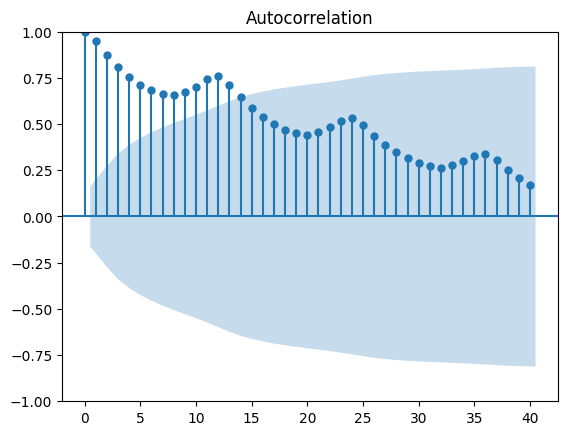

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df1,lags=40);

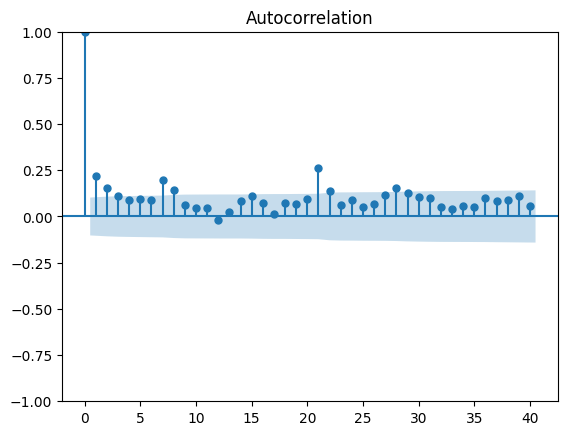

In [33]:
plot_acf(df2,lags=40);

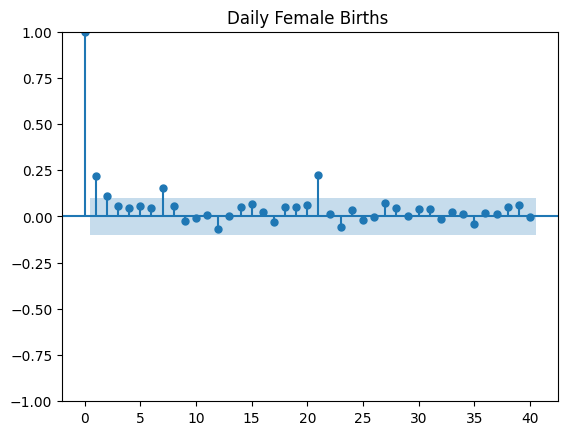

In [35]:
plot_pacf(df2, lags=40, title="Daily Female Births ");